In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [2]:
# reading in the data
df = pd.read_csv("movie-reviews-vectorized-data.csv")

In [3]:
# dropping unwanted columns
df = df.drop(["Unnamed: 0", "file_ID", "raw_text"], axis=1)

In [4]:
df = df.rename(columns={"Good": "is_good"})
df.head()

,is_good,ability,able,absolute,absolutely,accent,accept,accident,accidentally,according,...,yeah,year,years,yes,york,young,younger,zero,zombie,zombies
0,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,False,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,False,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


#### Gradient Descent

##### Acknowledgements. 
Some of the code was taken/modified from the Chapter4_LogisticRegression Jupyter Notebook from lecture. 

In [5]:
m = df.shape[0]
column_names = df.columns

# Seperate target column into two columns
good = np.where(df['is_good'] == 1, 1, 0)
not_good = np.where(df['is_good'] == 0, 1, 0)

# drop the is_good column
data = df.drop("is_good", axis=1)

# Add two new columns to df
data["is_good"] = good
data["is_not_good"] = not_good

data.head()

,ability,able,absolute,absolutely,accent,accept,accident,accidentally,according,accurate,...,years,yes,york,young,younger,zero,zombie,zombies,is_good,is_not_good
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [9]:
A = data.drop(["is_good", "is_not_good"], axis=1)
print(np.shape(A))

bias = np.ones(data.shape[0])
A['bias'] = bias.tolist()

b = data['is_not_good']

n = data.shape[1] - 1
T = 300
w = np.zeros(n)
hist_loss = np.zeros(T)
learning_rate = 1/(2*m)

# we will first choose this parameter value!
# regularization = 0.041

(2000, 1629)


In [10]:
# Gradient Descent

for j in np.arange(T):
    prb = 1./(1+np.exp(-A.dot(w)))
#     Grad = np.transpose(A).dot((prb  - b)) + regularization*np.multiply(np.sign(w),np.power(np.abs(w),1))
    Grad = np.transpose(A).dot((prb  - b))
    w = w - learning_rate*Grad
    hist_loss[j] =  - ( np.transpose(b).dot(np.log(prb)) + np.transpose(1-b).dot(np.log(1-prb)) )/m

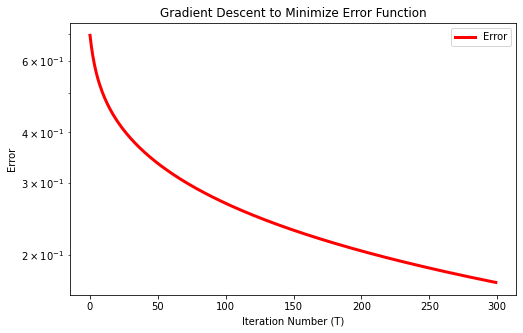

In [11]:
plt.figure(figsize=(8, 5))
plt.semilogy(np.asarray(range(0, T)), hist_loss , color='red', linewidth=3,label="Error")
plt.title("Gradient Descent to Minimize Error Function")
plt.xlabel("Iteration Number (T)")
plt.ylabel("Error")
plt.legend()
# plt.show()
# plt.savefig("gradient-descent-4.png")

#### Logistic Classifier

In [12]:
df

,is_good,ability,able,absolute,absolutely,accent,accept,accident,accidentally,according,...,yeah,year,years,yes,york,young,younger,zero,zombie,zombies
0,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,False,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,False,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,True,0,2,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1996,True,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,True,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1998,True,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Now, we will test this with out in-built logistic regression model!

from sklearn.model_selection import train_test_split

X = df.drop("is_good", axis=1)
y = df["is_good"]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.4)

In [14]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(Xtrain, ytrain)
LR.score(Xtrain, ytrain)

1.0

In [15]:
LR.score(Xtest, ytest)

0.81125

In [16]:
# Looks like we are overfitting our data. Let's try and see if we can add in a
# regularization parameter that controls the complexity of our model

In [17]:
from sklearn.model_selection import cross_val_score

max_score = 0
Lambda = 0

for reg_param in np.linspace(0.001, 0.1, 100):
    # including regularization parameter
    LR = LogisticRegression(C = reg_param)
    cv_score = cross_val_score(LR, Xtrain, ytrain, cv = 5).mean()
    
    if cv_score > max_score:
        Lambda = reg_param
        max_score = cv_score
    
print(str(np.round(Lambda, 3)), ": ", np.round(max_score, 3))

0.086 :  0.823


In [18]:
# Lets try lambda = 0.086!!

Lambda = 0.086
LR = LogisticRegression(C = Lambda)
LR.fit(Xtrain, ytrain)

# testing our model!
LR.score(Xtest, ytest)

0.835